In [217]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# import
beer_data = pd.read_csv("beer_data.csv")
beer_data.shape

(475984, 3)

In [219]:
# head(5) of df
beer_data.head(10)

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
5,58046,mikedrinksbeer2,4.5
6,58046,dbmernin83,4.0
7,58046,Blakaeris,4.5
8,58046,bashiba,4.5
9,58046,oberon,4.0


In [220]:
#info
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [221]:
# details
beer_data.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


#### Initial steps as usual:
### Data Cleaning

In [222]:
# column name looks bizzar to me, can use the beer_beerid as well but beerid will do for me, hence renmaing it
beer_data.rename(columns={'beer_beerid' : 'beerid'},inplace = True)

In [223]:
# checking all the nulls
beer_data.isnull().sum()

beerid                  0
review_profilename    100
review_overall          0
dtype: int64

In [224]:
# percent if NAs
round(100*(beer_data.isnull().sum()/len(beer_data.index)), 2)

beerid                0.00
review_profilename    0.02
review_overall        0.00
dtype: float64

In [225]:
beer_data = beer_data[~pd.isnull(beer_data['review_profilename'])]

In [226]:
# dealth with'em:)
round(100*(beer_data.isnull().sum()/len(beer_data.index)), 2)

beerid                0.0
review_profilename    0.0
review_overall        0.0
dtype: float64

In [227]:
# duplicates?
beer_data.duplicated(['beerid','review_profilename']).sum()

1422

In [228]:
#well there are some, no harm in dropping them up. lets do it
beer_data = beer_data.drop_duplicates(['beerid','review_profilename'],keep='first')

In [229]:
# duplicates == 0 yep we did it
beer_data.duplicated(['beerid','review_profilename']).sum()

0

### Data Preparation

In [230]:
# Choosing only the beers that have at least N number of reviews present
nReviewBeer = beer_data.groupby('beerid')['review_overall'].count().reset_index()

In [231]:
nReviewBeer.count()

beerid            40304
review_overall    40304
dtype: int64

In [232]:
# sorting them by reviews
nReviewBeer.sort_values('review_overall', ascending=False).head(5)


,beerid,review_overall
1574,2093,977
338,412,966
1427,1904,902
818,1093,840
78,92,812


In [233]:
# sorting them by reviews
nReviewBeer.sort_values('review_overall', ascending=True).head(5)

,beerid,review_overall
20151,37366,1
23276,43195,1
23275,43194,1
23274,43191,1
23273,43190,1


#### Looks like we have reviews from 1 to 977, beerid -- 2093 have highest number of reviews(977), pretty popular?.

In [234]:
nReviewBeer.describe()

,beerid,review_overall
count,40304.000000,40304.000000
mean,36973.166460,11.772082
std,22544.756432,41.888449
min,3.000000,1.000000
25%,16879.750000,1.000000
50%,37366.500000,2.000000
75%,56233.500000,5.000000
max,77317.000000,977.000000


In [235]:
# now lets work on the users, for starters lets get the distinct number of them
distinct_users = beer_data.groupby('review_profilename')['review_overall'].count().reset_index()

In [236]:
distinct_users.count()

review_profilename    22497
review_overall        22497
dtype: int64

In [237]:
# users review
distinct_users.sort_values('review_overall', ascending=False).head(5)

,review_profilename,review_overall
18188,northyorksammy,1842
17373,mikesgroove,1373
1629,BuckeyeNation,1336
8470,Thorpe429,1072
1910,ChainGangGuy,1046


In [238]:
distinct_users.sort_values('review_overall', ascending=True).head(5)

,review_profilename,review_overall
22496,zzajjber,1
6122,Nbarag,1
14214,gumushie,1
14215,gun1now,1
14216,gungorr,1


#### Max reviews comes from user_name :  "northyorksammy" that is -- 1842; impressive?

#### Lets plot some graphs as asked in the problem statement, also these will be helpful in determining N

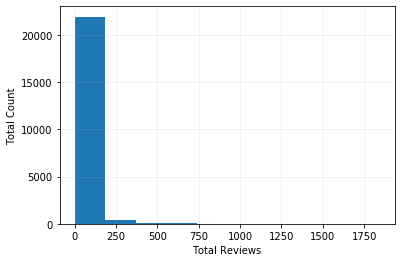

In [239]:
plt.hist(distinct_users['review_overall'], bins=10)
plt.grid(axis='x', alpha=0.20)
plt.grid(axis='y', alpha=0.20)
plt.xlabel('Total Reviews')
plt.ylabel('Total Count')
plt.show()


##### huge steep at the first bracket, lets break them down a bit

In [240]:
# starting from the top; lets checka ll the reviews overall
nReviewBeer.review_overall[nReviewBeer.review_overall == 1].value_counts()

1    18080
Name: review_overall, dtype: int64

##### thats a huge number, now createing a  separate DF with frequency of count of reviews; to get all the counts handy

In [241]:
nReviewBeer_frequency = nReviewBeer.groupby('review_overall').count().reset_index()
nReviewBeer_frequency.head(20)

,review_overall,beerid
0,1,18080
1,2,6183
2,3,3079
3,4,1895
4,5,1350
5,6,959
6,7,785
7,8,556
8,9,478
9,10,401


In [242]:
# geater or equal measure
nReviewBeer_count = nReviewBeer[nReviewBeer.review_overall >= 11]
nReviewBeer_count.head(20)

,beerid,review_overall
2,5,113
3,6,253
4,7,205
5,8,23
6,9,33
7,10,218
8,11,28
9,12,25
10,13,24
11,14,59


#### lets have a look at the parameter from the count df; 

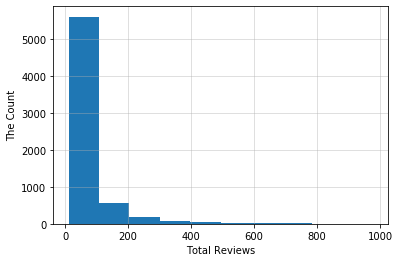

In [243]:
plt.hist(nReviewBeer_count['review_overall'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Total Reviews')
plt.ylabel('The Count')
plt.show()



In [244]:
#looking at the users from now onawrds.. with the steep from the graph
distinct_users = beer_data.groupby('review_profilename')['review_overall'].count().reset_index()

In [245]:
distinct_users_count = distinct_users[distinct_users.review_overall >= 30]
distinct_users.head(20)

,review_profilename,review_overall
0,0110x011,35
1,01Ryan10,1
2,03SVTCobra,1
3,04101Brewer,1
4,05Harley,41
5,0beerguy0,3
6,0runkp0s,1
7,0tt0,14
8,1000Bottles,8
9,1001111,2


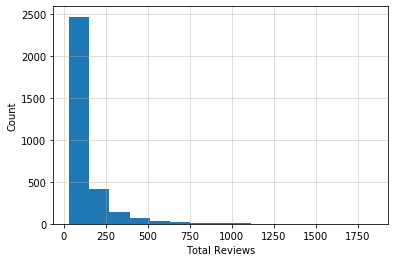

In [246]:
plt.hist(distinct_users_count['review_overall'], bins=15)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Total Reviews')
plt.ylabel('Count')
plt.show()

In [247]:
df_beer_data = beer_data.merge(nReviewBeer_count,how='inner',on='beerid')
df_beer_data =df_beer_data.merge(distinct_users_count,how='inner',on='review_profilename')

In [248]:
df_beer_data.rename(columns={'review_overall_x' : 'total_reviews','review_overall_y':'total_beer_reviews','review_overall' : 'total_user_reviews'},inplace = True)

In [249]:
df_beer_data.head()

,beerid,review_profilename,total_reviews,total_beer_reviews,total_user_reviews
0,58046,dbmernin83,4.0,12,32
1,30420,dbmernin83,4.0,612,32
2,3158,dbmernin83,5.0,575,32
3,36727,dbmernin83,4.0,170,32
4,11922,dbmernin83,4.0,379,32


### Data Exploration

In [250]:
# 1.What are the unique values of ratings?
unique_rating_values = df_beer_data['total_reviews'].value_counts(ascending=True)
unique_rating_values

1.0      1690
1.5      2085
2.0      6759
2.5     10674
5.0     15939
3.0     31714
3.5     61799
4.5     65595
4.0    119683
Name: total_reviews, dtype: int64

#### Visualising the rating values and notice.

In [251]:
## 2.1 The average beer ratings :
avg_beer_ratings = df_beer_data.groupby('beerid')['total_reviews'].agg(['mean']).reset_index()
avg_beer_ratings.head()

,beerid,mean
0,5,3.532609
1,6,3.707895
2,7,3.272109
3,8,3.444444
4,9,3.344828


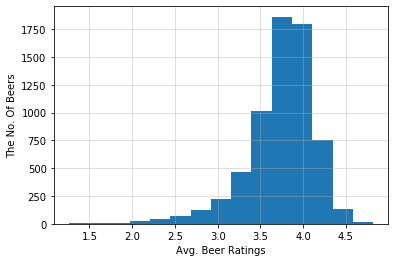

In [252]:
#plotting the graph
plt.hist(avg_beer_ratings['mean'], bins=15)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Avg. Beer Ratings')
plt.ylabel('The No. Of Beers')
plt.show()


In [253]:
avg_beer_ratings.describe()

,beerid,mean
count,6538.000000,6538.000000
mean,26673.281279,3.740884
std,22205.614689,0.395493
min,5.000000,1.258333
25%,4072.250000,3.571429
50%,24437.000000,3.805556
75%,45776.500000,4.000000
max,76816.000000,4.818182


In [254]:
# getting all the data
avg_beer_ratings_all = beer_data.groupby('beerid')['review_overall'].agg(['mean']).reset_index()
avg_beer_ratings_all.head()

,beerid,mean
0,3,4.250000
1,4,3.666667
2,5,3.553097
3,6,3.711462
4,7,3.317073


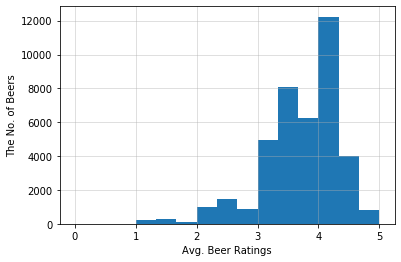

In [255]:
#plotting them all
plt.hist(avg_beer_ratings_all['mean'], bins=15)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Avg. Beer Ratings')
plt.ylabel('The No. of Beers')
plt.show()


In [256]:
avg_beer_ratings_all.describe()

,beerid,mean
count,40304.000000,40304.000000
mean,36973.166460,3.670510
std,22544.756432,0.642731
min,3.000000,0.000000
25%,16879.750000,3.500000
50%,37366.500000,3.799531
75%,56233.500000,4.000000
max,77317.000000,5.000000


In [257]:
# 2.2 The average user ratings
avg_user_ratings = df_beer_data.groupby('review_profilename')['total_reviews'].agg(['mean']).reset_index()
avg_user_ratings.head()

,review_profilename,mean
0,0110x011,4.303030
1,05Harley,4.152778
2,100floods,4.035714
3,1759Girl,3.687500
4,1fastz28,3.852174


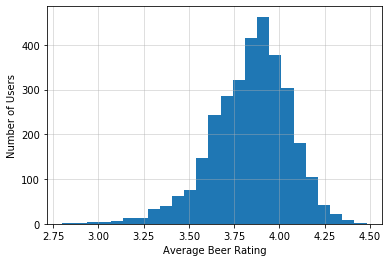

In [258]:
#plot
plt.hist(avg_user_ratings['mean'], bins=25)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Beer Rating')
plt.ylabel('Number of Users')
plt.show()


In [259]:
avg_user_ratings.describe()

,mean
count,3176.000000
mean,3.840760
std,0.216716
min,2.800000
25%,3.707852
50%,3.864164
75%,3.985714
max,4.482759


In [260]:
# 2.3 The average number of ratings given to the beers
avg_beer_reviews = df_beer_data.groupby('beerid')['total_reviews'].agg(['mean']).reset_index()
avg_beer_reviews.head()


,beerid,mean
0,5,3.532609
1,6,3.707895
2,7,3.272109
3,8,3.444444
4,9,3.344828


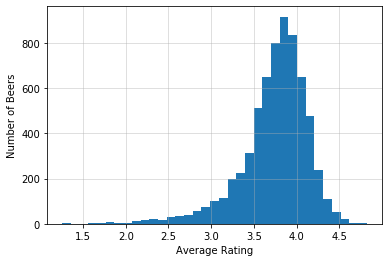

In [261]:
#plot
plt.hist(avg_beer_reviews['mean'], bins=35)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()


In [262]:
avg_beer_reviews.describe()

,beerid,mean
count,6538.000000,6538.000000
mean,26673.281279,3.740884
std,22205.614689,0.395493
min,5.000000,1.258333
25%,4072.250000,3.571429
50%,24437.000000,3.805556
75%,45776.500000,4.000000
max,76816.000000,4.818182


In [263]:
nReviewBeer.head()

,beerid,review_overall
0,3,2
1,4,6
2,5,113
3,6,253
4,7,205


### Recommender Models.

In [264]:
df_beer_data.head()

,beerid,review_profilename,total_reviews,total_beer_reviews,total_user_reviews
0,58046,dbmernin83,4.0,12,32
1,30420,dbmernin83,4.0,612,32
2,3158,dbmernin83,5.0,575,32
3,36727,dbmernin83,4.0,170,32
4,11922,dbmernin83,4.0,379,32


In [265]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_beer_data, test_size=0.30, random_state=25)

In [266]:
train.shape

(221156, 5)

In [267]:
test.shape

(94782, 5)

In [268]:
# pivot ratings into beer features
beer_features = train.pivot_table(index='review_profilename', columns='beerid', values='total_reviews', fill_value=0)

In [269]:
beer_features.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### datasets

In [270]:
#copying the datasets for more processing to build the recommender system
train_copy = train.copy()
test_copy = test.copy()

In [271]:
train_copy['total_reviews'] = train_copy['total_reviews'].apply(lambda x: 0 if x>=1 else 1)
test_copy['total_reviews']  = test_copy['total_reviews'].apply(lambda x: 1 if x>=1 else 0)

In [272]:
# The movies not rated by user is marked as 1 for prediction. 
train_copy = train_copy.pivot(
    index='review_profilename',
    columns='beerid',
    values='total_reviews'
).fillna(1)

# The movies not rated by user is marked as 0 for evaluation. 
test_copy = test_copy.pivot(
    index='review_profilename',
    columns='beerid',
    values='total_reviews'
).fillna(0)

In [273]:
train_copy.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100floods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [274]:
test_copy.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### User Similarity Matrix  -- 1. Cosine Similarity

In [275]:
from sklearn.metrics.pairwise import pairwise_distances

corr_users = 1 - pairwise_distances(beer_features, metric='cosine')
corr_users[np.isnan(corr_users)] = 0

In [276]:
print(corr_users)
print(corr_users.shape)

[[1.         0.         0.04391285 ... 0.03096466 0.         0.        ]
 [0.         1.         0.03165713 ... 0.02746736 0.01624386 0.        ]
 [0.04391285 0.03165713 1.         ... 0.03108296 0.05955793 0.        ]
 ...
 [0.03096466 0.02746736 0.03108296 ... 1.         0.         0.        ]
 [0.         0.01624386 0.05955793 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(3176, 3176)


#### User Similarity Matrix  -- 2. adjusted Cosine 

In [277]:
beer_features = train.pivot(index='review_profilename', columns='beerid', values='total_reviews')

In [278]:
beer_features.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,3.5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
# Normalised the total_reviews for each user

mean_nan = np.nanmean(beer_features, axis=1)
beer_data_diff = (beer_features.T-mean_nan).T

In [280]:
beer_data_diff.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.315068,NaN,NaN,NaN,0.184932,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
from sklearn.metrics.pairwise import pairwise_distances

# cosine similarity -- User Similarity Matrix
corr_users = 1 - pairwise_distances(beer_data_diff.fillna(0), metric='cosine')
corr_users[np.isnan(corr_users)] = 0
corr_users

array([[ 1.00000000e+00,  0.00000000e+00, -1.80005128e-02, ...,
        -8.35017178e-04,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.19303446e-03, ...,
        -2.15288883e-02,  1.94621925e-02,  0.00000000e+00],
       [-1.80005128e-02,  2.19303446e-03,  1.00000000e+00, ...,
        -3.49624972e-02,  1.86584527e-03,  0.00000000e+00],
       ...,
       [-8.35017178e-04, -2.15288883e-02, -3.49624972e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.94621925e-02,  1.86584527e-03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [282]:
# Prediction making
corr_users[corr_users < 0] = 0
corr_users

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00219303, ..., 0.        , 0.01946219,
        0.        ],
       [0.        , 0.00219303, 1.        , ..., 0.        , 0.00186585,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.01946219, 0.00186585, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [283]:
user_pred_rating = np.dot(corr_users, beer_features.fillna(0))
user_pred_rating

array([[0.91472702, 2.20340051, 1.44846041, ..., 0.1878928 , 0.09853094,
        0.19318637],
       [2.20286748, 3.80349403, 2.81903548, ..., 0.        , 0.64325843,
        0.83678707],
       [0.49841036, 1.29660167, 1.29692479, ..., 0.07772825, 0.23575679,
        0.72626309],
       ...,
       [4.68232252, 6.30500922, 4.83218404, ..., 0.21528625, 0.31553096,
        0.24530876],
       [2.23745351, 6.32711393, 4.2748027 , ..., 0.28832797, 0.21728075,
        0.59609857],
       [2.34365101, 4.31355319, 3.1682316 , ..., 0.09255891, 0.15183891,
        0.32806575]])

In [284]:
user_pred_rating.shape

(3176, 6538)

###### Ignoring the movies rated by the user by making it '0' as we are interested only in the movies not rated by the user.

In [285]:
user_rating_final = np.multiply(user_pred_rating,train_copy)
user_rating_final.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.914727,2.203401,1.448460,0.101784,0.145051,2.501165,0.168012,0.220619,0.349741,0.580878,...,1.626775,0.809601,0.162419,1.243756,0.000000,0.130460,0.569207,0.187893,0.098531,0.193186
05Harley,2.202867,3.803494,2.819035,0.212641,0.107895,3.923978,0.142567,0.233205,0.243944,0.600434,...,2.077815,1.924728,0.116038,0.853802,0.150349,1.142366,0.570404,0.000000,0.643258,0.836787
100floods,0.498410,1.296602,1.296925,0.304242,0.116311,2.147266,0.143123,0.141533,0.209004,0.321436,...,1.624722,1.890634,0.577956,0.478906,0.363553,0.000000,0.268736,0.077728,0.235757,0.726263
1759Girl,3.784945,5.147066,5.353430,0.561075,0.635145,6.186279,0.780514,0.682583,0.834541,1.486244,...,1.283510,1.999576,1.022832,0.373214,0.616713,0.108301,0.328577,0.138116,0.461367,0.440469
1fastz28,2.380430,0.000000,3.326630,0.399406,0.887856,0.000000,0.530173,0.781597,0.844081,1.201189,...,1.251374,1.396213,0.773638,0.571277,0.117779,0.424170,0.379070,0.147920,0.539806,0.706968


In [286]:
# The top 5 recommendation for the user1 
user_rating_final.iloc[1].sort_values(ascending=False).head(5)

beerid
680      18.619958
412      18.457968
1093     17.713025
17112    16.757170
4083     16.732713
Name: 05Harley, dtype: float64

#### Item Based Similarity

In [287]:
# Using Correlation over hear to pivot
beer_features = train.pivot(
    index='review_profilename',
    columns='beerid',
    values='total_reviews'
)

beer_features.shape

(3176, 6538)

In [288]:
# Normalising the rating for each beer using followibng steps
mean_nan = np.nanmean(beer_features, axis=1)
beer_data_diff = (beer_features.T - mean_nan).T

In [289]:
beer_data_diff.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.315068,NaN,NaN,NaN,0.184932,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
# cosine similarity here
from sklearn.metrics.pairwise import pairwise_distances

# user similarity matrix
item_corr = 1 - pairwise_distances(beer_data_diff.fillna(0), metric='cosine')
item_corr[np.isnan(item_corr)] = 0
item_corr

array([[ 1.00000000e+00,  0.00000000e+00, -1.80005128e-02, ...,
        -8.35017178e-04,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.19303446e-03, ...,
        -2.15288883e-02,  1.94621925e-02,  0.00000000e+00],
       [-1.80005128e-02,  2.19303446e-03,  1.00000000e+00, ...,
        -3.49624972e-02,  1.86584527e-03,  0.00000000e+00],
       ...,
       [-8.35017178e-04, -2.15288883e-02, -3.49624972e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.94621925e-02,  1.86584527e-03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

#####  since the data was normalized, both the cosine metric and correlation metric gave the same values. 

In [291]:
# filtering the corr only as per Positively correlated values
item_corr[item_corr < 0] = 0
item_corr

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00219303, ..., 0.        , 0.01946219,
        0.        ],
       [0.        , 0.00219303, 1.        , ..., 0.        , 0.00186585,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.01946219, 0.00186585, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [292]:
item_pred_rating = np.dot(item_corr, beer_features.fillna(0))
item_pred_rating

array([[0.91472702, 2.20340051, 1.44846041, ..., 0.1878928 , 0.09853094,
        0.19318637],
       [2.20286748, 3.80349403, 2.81903548, ..., 0.        , 0.64325843,
        0.83678707],
       [0.49841036, 1.29660167, 1.29692479, ..., 0.07772825, 0.23575679,
        0.72626309],
       ...,
       [4.68232252, 6.30500922, 4.83218404, ..., 0.21528625, 0.31553096,
        0.24530876],
       [2.23745351, 6.32711393, 4.2748027 , ..., 0.28832797, 0.21728075,
        0.59609857],
       [2.34365101, 4.31355319, 3.1682316 , ..., 0.09255891, 0.15183891,
        0.32806575]])

In [293]:
# filtering all the ratings not rated by user
item_rating_finale = np.multiply(item_pred_rating,train_copy)
item_rating_finale.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.914727,2.203401,1.448460,0.101784,0.145051,2.501165,0.168012,0.220619,0.349741,0.580878,...,1.626775,0.809601,0.162419,1.243756,0.000000,0.130460,0.569207,0.187893,0.098531,0.193186
05Harley,2.202867,3.803494,2.819035,0.212641,0.107895,3.923978,0.142567,0.233205,0.243944,0.600434,...,2.077815,1.924728,0.116038,0.853802,0.150349,1.142366,0.570404,0.000000,0.643258,0.836787
100floods,0.498410,1.296602,1.296925,0.304242,0.116311,2.147266,0.143123,0.141533,0.209004,0.321436,...,1.624722,1.890634,0.577956,0.478906,0.363553,0.000000,0.268736,0.077728,0.235757,0.726263
1759Girl,3.784945,5.147066,5.353430,0.561075,0.635145,6.186279,0.780514,0.682583,0.834541,1.486244,...,1.283510,1.999576,1.022832,0.373214,0.616713,0.108301,0.328577,0.138116,0.461367,0.440469
1fastz28,2.380430,0.000000,3.326630,0.399406,0.887856,0.000000,0.530173,0.781597,0.844081,1.201189,...,1.251374,1.396213,0.773638,0.571277,0.117779,0.424170,0.379070,0.147920,0.539806,0.706968


In [294]:
# Top 5 prediction for the user1
item_rating_finale.iloc[1].sort_values(ascending=False).head(5)

beerid
680      18.619958
412      18.457968
1093     17.713025
17112    16.757170
4083     16.732713
Name: 05Harley, dtype: float64

##### Evaluation -- we evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user. 

In [295]:
# user similarity measures
beer_features_test = test.pivot(
    index='review_profilename',
    columns='beerid',
    values='total_reviews'
)
mean_nan = np.nanmean(beer_features_test, axis=1)
test_beer_data_diff = (beer_features_test.T - mean_nan).T

# matrix
test_users_correlation = 1 - pairwise_distances(test_beer_data_diff.fillna(0), metric='cosine')
test_users_correlation[np.isnan(test_users_correlation)] = 0
test_users_correlation

array([[ 1.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  1.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  1.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  1.       , -0.0068008,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ..., -0.0068008,  1.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         1.       ]])

In [296]:
test_users_correlation[test_users_correlation < 0]=0
test_user_rating_predicted = np.dot(test_users_correlation, beer_features_test.fillna(0))
test_user_rating_predicted

array([[0.30155024, 0.63033397, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05569761, 0.74033551, 0.21715736, ..., 0.        , 0.        ,
        0.        ],
       [0.26999002, 0.81230014, 0.2731088 , ..., 0.02335237, 0.06567615,
        0.13411633],
       ...,
       [1.46975157, 2.14342665, 0.26510749, ..., 0.23872691, 0.        ,
        0.05045642],
       [0.38066024, 0.94608451, 1.12592468, ..., 0.01874741, 0.        ,
        0.09128982],
       [0.69265429, 0.75070125, 1.45207881, ..., 0.11453704, 0.        ,
        0.37952911]])

In [297]:
# predictions for the beer rated by the user
test_user_rating_final = np.multiply(test_user_rating_predicted,test_copy)

In [298]:
test_user_rating_final.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,3.665787,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:

# The RMSE for the beer rated by user. 
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_rating_final.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

y

MinMaxScaler(copy=True, feature_range=(1, 5))


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [300]:
test_ = test.pivot(
    index='review_profilename',
    columns='beerid',
    values='total_reviews'
)

In [301]:
# Finding the total number of non-NaN values
count_non_NaN = np.count_nonzero(~np.isnan(y))

In [302]:
rmse = (sum(sum((test_ - y )**2))/count_non_NaN)**0.5
rmse

1.636854788281375

In [303]:
# Using the Item similarity measure
beer_features_test = test.pivot(
    index='review_profilename',
    columns='beerid',
    values='total_reviews'
).T

mean_nana = np.nanmean(beer_features_test, axis=1)
test_beer_data_diff = (beer_features_test.T-mean_nana).T

In [304]:
test_item_corr = 1 - pairwise_distances(test_beer_data_diff.fillna(0), metric='cosine')
test_item_corr[np.isnan(test_item_corr)] = 0
test_item_corr[test_item_corr < 0]=0

In [305]:
test_item_corr.shape

(6502, 6502)

In [306]:
beer_features_test.shape

(6502, 3176)

In [307]:
test_item_predicted_ratings = (np.dot(test_item_corr, beer_features_test.fillna(0))).T
test_item_rating_finale = np.multiply(test_item_predicted_ratings,test_copy)
test_item_rating_finale.head()

beerid,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,7.268675,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
test_ = test.pivot(index='review_profilename', columns='beerid', values='total_reviews')

In [309]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_rating_finale.copy() 
X = X[X > 0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beerid',
    values='total_reviews'
)

# Finding total non-NaN value
count_non_NaN = np.count_nonzero(~np.isnan(y))

C:\Users\Builder\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Builder\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler(copy=True, feature_range=(1, 5))


In [310]:
rmse = (sum(sum((test_ - y )**2))/count_non_NaN)**0.5
rmse

2.265616680152485

Done.

In [311]:
#more questions.....
user_rating_final.loc['cokes'].sort_values(ascending=False).head(5)

beerid
412     23.305077
34      22.166173
4083    22.126656
1708    21.975367
88      20.722039
Name: cokes, dtype: float64

In [312]:
user_rating_final.loc['genog'].sort_values(ascending=False).head(5)

beerid
2093    24.508917
1093    23.627696
412     22.455310
3158    21.214847
88      20.454742
Name: genog, dtype: float64

In [313]:
user_rating_final.loc['giblet'].sort_values(ascending=False).head(5)


beerid
412     39.598289
4083    36.590898
1904    34.473749
92      33.520642
1708    32.877349
Name: giblet, dtype: float64

In [314]:
item_rating_finale.loc['cokes'].sort_values(ascending=False).head(5)

beerid
412     23.305077
34      22.166173
4083    22.126656
1708    21.975367
88      20.722039
Name: cokes, dtype: float64

In [315]:
item_rating_finale.loc['genog'].sort_values(ascending=False).head(5)

beerid
2093    24.508917
1093    23.627696
412     22.455310
3158    21.214847
88      20.454742
Name: genog, dtype: float64

In [316]:
item_rating_finale.loc['giblet'].sort_values(ascending=False).head(5)

beerid
412     39.598289
4083    36.590898
1904    34.473749
92      33.520642
1708    32.877349
Name: giblet, dtype: float64

Thats all..................